# Визуализация
Визуализация наглядно показывает тренды, паттерны и выбросы, которые тяжело увидеть в числах, особенно когда их много

![DinoUrl](https://d2f99xq7vri1nk.cloudfront.net/DinoSequentialSmaller.gif "source: https://www.autodesk.com/research/publications/same-stats-different-graphs")

## Какой график выбрать?

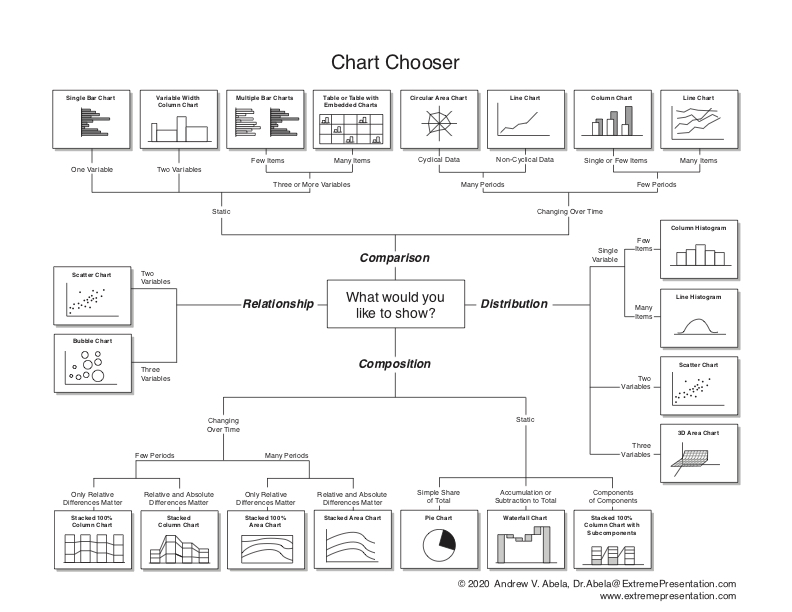

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [4]:
np.random.seed(5)

# Инструменты

## Matplotlib

### Line plot

In [7]:
import matplotlib.pyplot as plt
#Импорт библиотеки Matplotlib как объект plt

In [11]:
#Формирование данный для обычного графика
x = np.linspace(0, 10, 25)
#Генерация массива из 25 равномерно удаленныйх значений от нуля до 10
y = np.sin(x) + x/2
#Генерация значений ординат - функция sin(x) + x/2

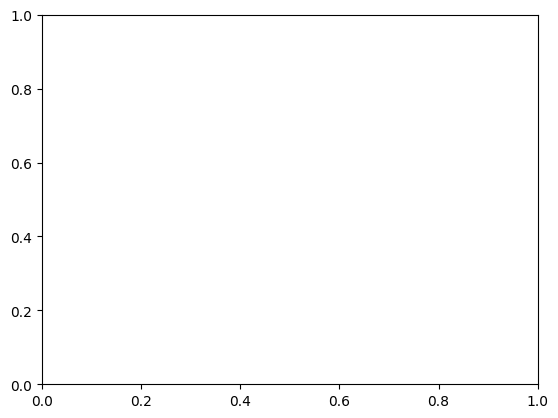

In [12]:
fig, ax = plt.subplots()

In [15]:
ax.plot(x, y);
#Так не работает, поскольку точки нужно наносить на координатное полотно

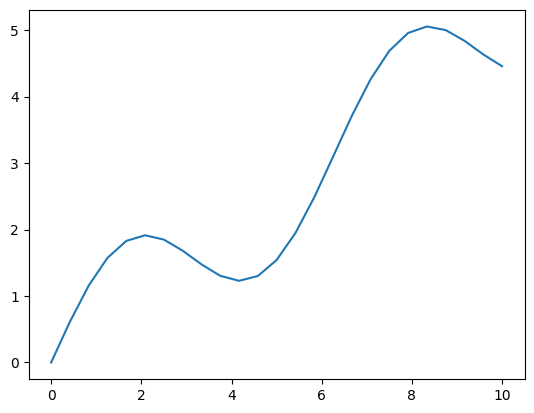

In [18]:
#Сначала делаем полодно ax и сразу накидываем точки, масштабирование выполняется автоматически
fig, ax = plt.subplots()
ax.plot(x, y);
#Теперь работает!

In [19]:
#Усложним: нарисуем два графика на одном полотне с обозначением точек

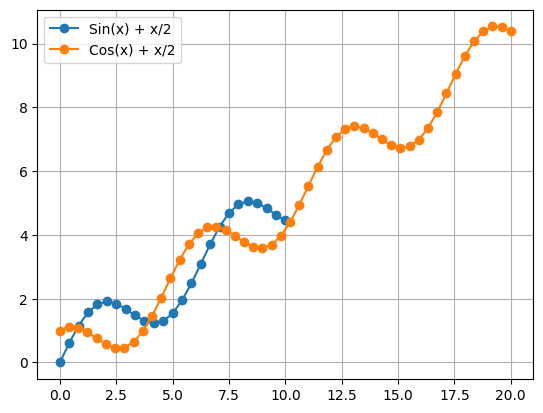

In [33]:
x1 = np.linspace(0, 10, 25)
y1 = np.sin(x1) + x1/2

x2 = np.linspace(0, 20, 50)
#Можно задавать разные значения, но только один должны использоваться в следующей функции, иначе результаты непредсказуемы
#Но лучше не стоит так "баловаться"

y2 = np.cos(x2) + x2/2 #у преподавателя было x1/2. Если так остваить, то будет вылет за пределы массива.
#Здесь мы сформировали массивы координат абсцисс, ордина для обеих функций
fig, ax = plt.subplots()

#Создали пустое полотно с осями
ax.plot(x1, y1, marker="o", label="Sin(x) + x/2")
ax.plot(x2, y2, marker="o", label="Cos(x) + x/2")
#Чпокнули два графика с маркерами в виде кружочков и заданием имен рядов
ax.legend();
#Приделали легенду
ax.grid(True)
#Нарезали грид

### Box plot - статистические свойства: минимум, максимум, среднее, выбросы

In [42]:
x = np.random.normal(0, 1, 200)
#Нагенерили 200 нормально распределенных псевдослучайныых значений с матожиданием нуль, случайным отклонением sigma - 1

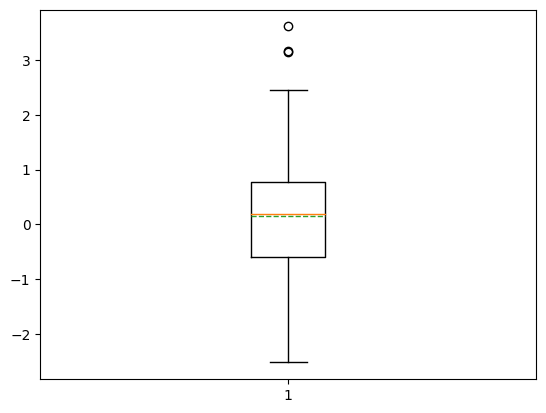

In [45]:
fig, ax = plt.subplots()
ax.boxplot(x, showmeans=True, meanline=True);
# ящик с усами с отборажением среднего (оранжевая линия), медианы (пунктир). 
# Усы: 25 и 25 процентов снизу и сверух самого ящика (50%). Кружочки - выбросы (аномалии)

# Violin plot - похож на box plot, но с формой распределения
"Послушайте, у меня виолончель" :-)

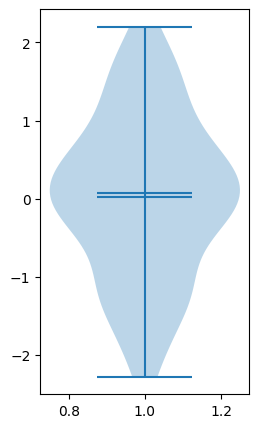

In [47]:
x = np.random.normal(0, 1, 100)

fig, ax = plt.subplots(figsize=(2.7, 5))
ax.violinplot(x, showmeans=True, showmedians=True);

### Гистограмма - визуализация непрерывных распределений

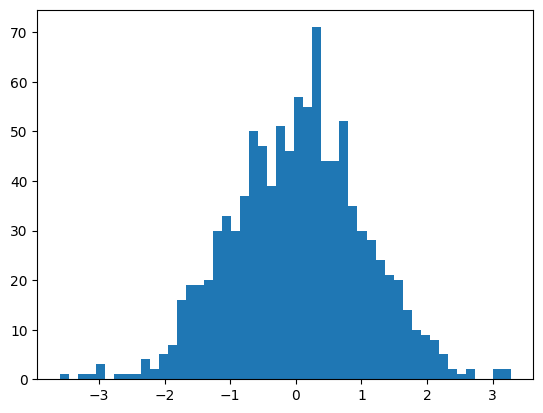

In [53]:
x = np.random.normal(0, 1, 1000)

fig, ax = plt.subplots()
ax.hist(x, 50);
#Гистограмма с 50 столбиками

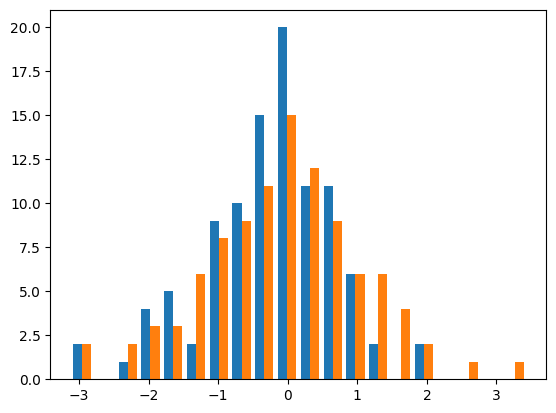

In [54]:
x1 = np.random.normal(0, 1, 100)
x2 = np.random.normal(0, 1, 100)
x = [x1, x2]

fig, ax = plt.subplots()
ax.hist(x,20)
plt.show();

### Bar plot для сравнения категорий. Тип данных - категориальные

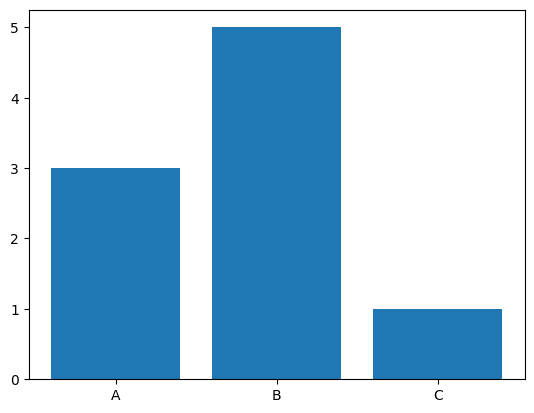

In [55]:
x = ["A", "B", "C"]
y = [3, 5, 1]

fig, ax = plt.subplots()
ax.bar(x = x, height=y);

In [77]:
groups = ['G1', 'G2', 'G3', 'G4', 'G5']
values1 = np.array([12, 19, 14, 27, 16])
values2 = np.array([21, 30, 15, 17, 20])
values3 = np.array([10, 12, 30, 22, 17])
bottom2 = values1 + values2
#Это работает для массивово np. Если делать обычные списки, то оператор "+" второй список приделает к первому

bottom2

array([33, 49, 29, 44, 36])

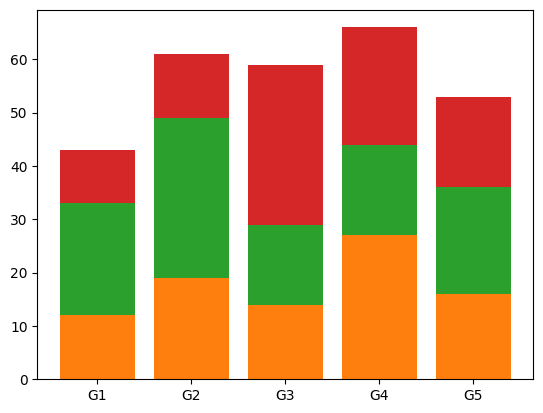

In [78]:
fig, ax = plt.subplots()

ax.bar(groups, bottom2)
ax.bar(groups, values1)
ax.bar(groups, values2, bottom=values1)
ax.bar(groups, values3, bottom=values1+values2);
#Так прокатит, если массивы values1-3 np-шные.

### Pie chart - показывает доли категорий от всей выборки - круговая диаграмма с дольками

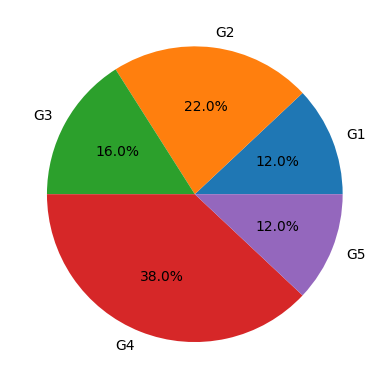

In [79]:
labels = ["G1", "G2", "G3", "G4", "G5"]
value = [12, 22, 16, 38, 12]

fig, ax = plt.subplots()
ax.pie(value, labels=labels, autopct='%1.1f%%');

### Scatter plot - показывает отношение между двумя переменными

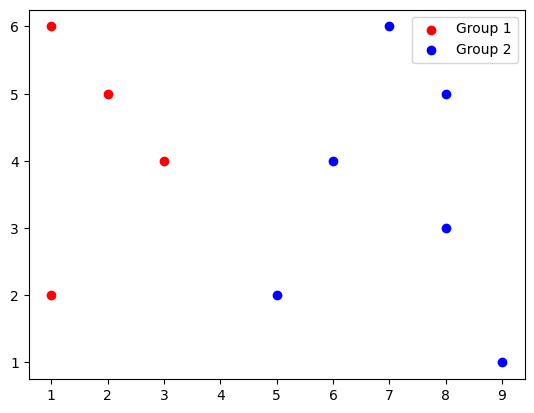

In [81]:
x1 = np.array([1, 1, 2, 3])
y1 = np.array([2, 6, 5, 4])

plt.scatter(x1, y1, c="red", label="Group 1")

x2 = np.array([5, 6, 7, 8, 8, 9])
y2 = np.array([2, 4, 6, 5, 3, 1])

plt.scatter(x2, y2, c="blue", label="Group 2")

plt.legend();

### Heatmap - для изображения коэффициентов корреляции (теплушка или тепловая карта)

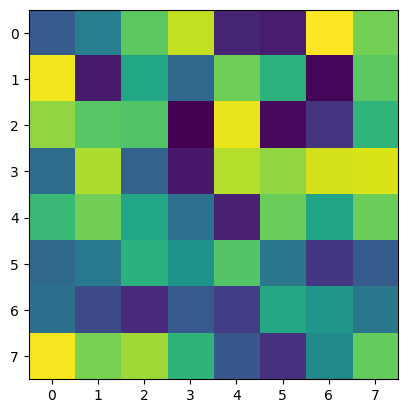

In [86]:
data = np.random.random((8, 8))

xlabs = ["G1", "G2", "G3", "G4",
         "G5", "G6", "G7", "G8"]
ylabs = ["A", "B", "C", "D",
         "E", "F", "G", "H"]
         

fig, ax = plt.subplots()
ax.imshow(data);

### Облако слов

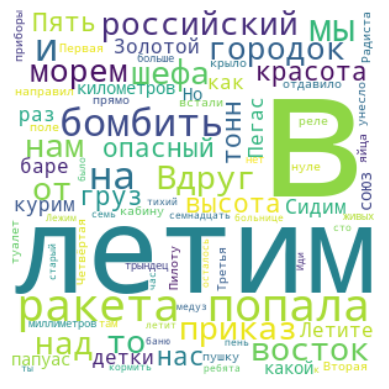

In [89]:
from wordcloud import WordCloud

text = """Сидим мы в баре как-то раз, 
И курим Золотой Пегас, 
Вдруг от шефа нам приказ:
Летите, детки, на восток 
бомбить российский городок! 
Летим над морем – красота. 
Пять километров высота, 
17 тонн опасный груз, 
и мы летим бомбить союз! 

Но вдруг какой-то папуас, 
направил пушку прямо в нас. 
Первая ракета попала в кабину. 
Пилоту яйца отдавило. 
Вторая ракета попала в реле - 
приборы встали на нуле. 
Третья ракета попала в крыло - 
Радиста в поле унесло. 
Четвёртая ракета попала в туалет, 
трындец, живых там больше нет! 

Летим над морем – красота. 
Пять миллиметров высота, 
семнадцать тонн опасный груз, 

и мы летим кормить медуз! 
Лежим в больнице в тихий час, 
от шефа к нам летит приказ: 
летим ребята на восток, 
бомбить российский городок! 
Иди ты в баню – старый пень! 
Нас было сто, осталось семь!"""

wc = WordCloud(width=300, height=300, background_color="white")
wc.generate(text)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear");

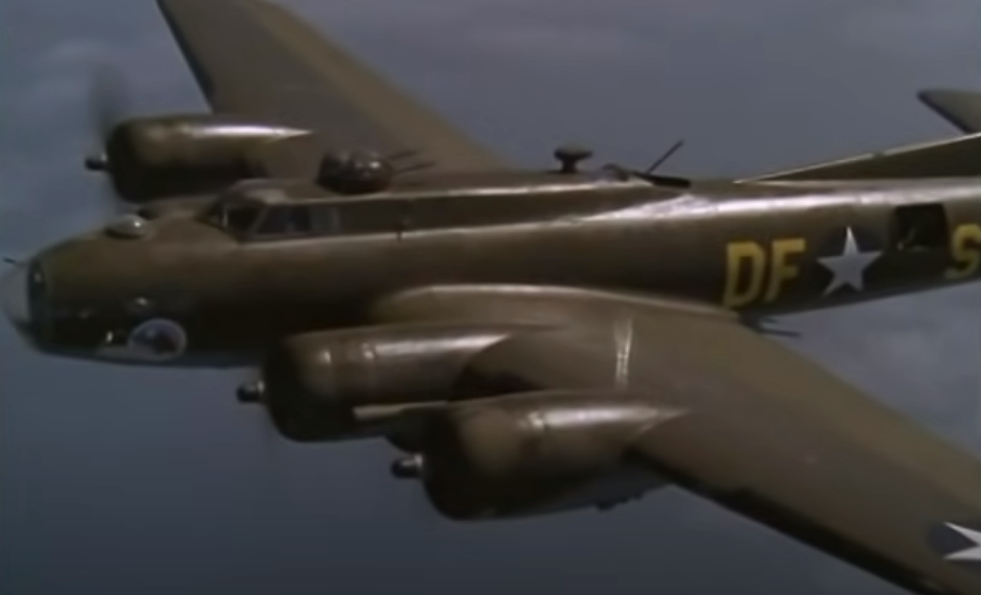

### Seaborn

In [93]:
import seaborn as sns
import random

In [91]:
sns.set(rc={'figure.figsize':(10, 8)})
# задание отношение сторон и размера изображения

In [94]:
rng = np.random.RandomState(5)
variable = rng.normal(0, 1, size=100)
group = random.choices(["G1", "G2", "G3"], k=100)

In [95]:
group

['G1',
 'G3',
 'G3',
 'G2',
 'G2',
 'G1',
 'G1',
 'G3',
 'G3',
 'G3',
 'G3',
 'G3',
 'G2',
 'G1',
 'G3',
 'G2',
 'G1',
 'G1',
 'G1',
 'G2',
 'G3',
 'G2',
 'G3',
 'G1',
 'G2',
 'G2',
 'G1',
 'G2',
 'G1',
 'G2',
 'G1',
 'G2',
 'G1',
 'G3',
 'G1',
 'G2',
 'G1',
 'G2',
 'G3',
 'G2',
 'G1',
 'G2',
 'G1',
 'G2',
 'G2',
 'G1',
 'G2',
 'G3',
 'G3',
 'G1',
 'G2',
 'G2',
 'G2',
 'G2',
 'G2',
 'G1',
 'G3',
 'G2',
 'G2',
 'G1',
 'G1',
 'G2',
 'G1',
 'G2',
 'G1',
 'G2',
 'G3',
 'G2',
 'G3',
 'G2',
 'G2',
 'G2',
 'G3',
 'G1',
 'G1',
 'G2',
 'G1',
 'G3',
 'G2',
 'G2',
 'G1',
 'G3',
 'G1',
 'G2',
 'G1',
 'G3',
 'G2',
 'G1',
 'G1',
 'G2',
 'G1',
 'G3',
 'G3',
 'G1',
 'G3',
 'G2',
 'G1',
 'G2',
 'G3',
 'G3']

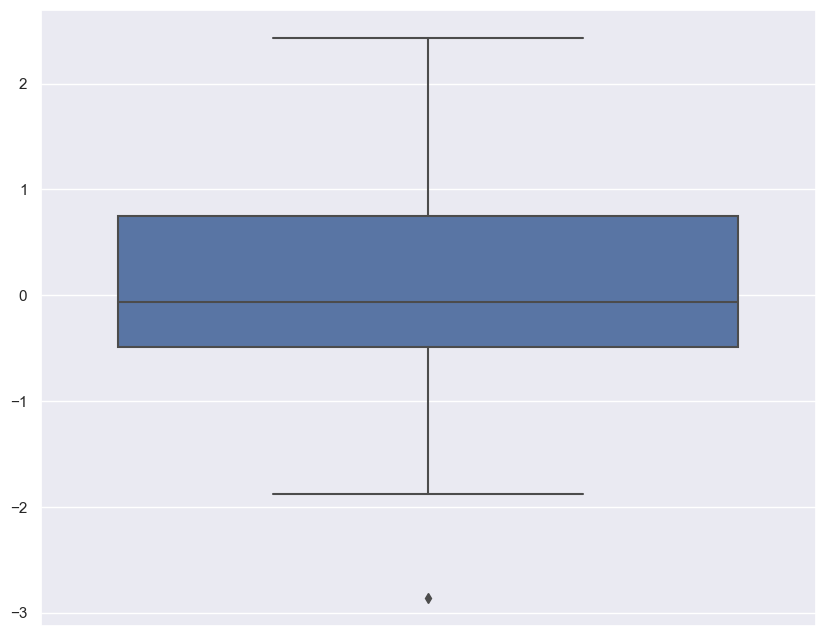

In [96]:
sns.boxplot(y=variable);

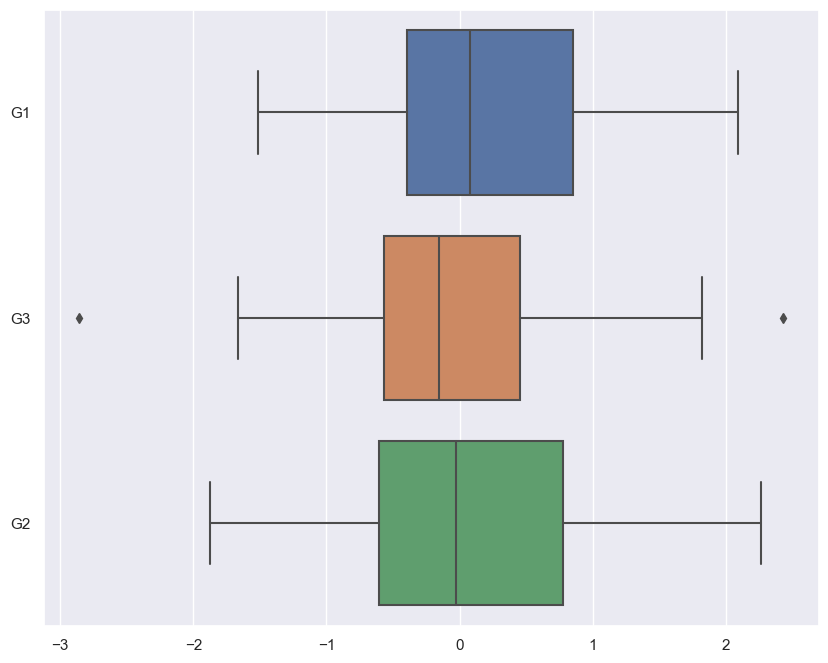

In [97]:
sns.boxplot(x=variable, y=group);

### Scatter plot|

In [105]:
x = rng.uniform(0, 1, 500)
#500 равномерно распределенных чисел от 0 до 1
y = 5 * x + rng.normal(0, 2, size = 500)
# складываем массивы: каждый элемент x умноженный на пять и одно из нормально распределенных чисел с МО 0 и сигмой 2
group = np.where(x < 0.4, "A", np.where(x > 0.8, "C", "B"))
# раскидываем элементы массива x на три группы: A: x<0,4; B: 0,4<=x<=0,8; C: x>0,8
x = x + rng.uniform(-0.2, 0.2, 500)
# к иксу докидываем равномерно-распределеные числа от -0,2 до 0,2
df = {'x': x, 'y': y, 'group': group}
# "склеиваем" массивы
df

{'x': array([ 0.72127185,  0.68506803,  0.08781095,  0.7880181 ,  0.53004398,
        -0.08175325,  0.87473436,  0.9584727 ,  0.39160778,  0.37909425,
         0.72699974,  0.40696926,  0.50634028,  0.93884882,  0.89760598,
         0.36845074,  0.4034542 ,  0.78228453,  1.12884031,  1.04315947,
         0.80008526,  0.23655812,  0.00449222,  0.28802879,  1.09846762,
         0.46759018,  1.03466568,  0.70915479,  0.4640175 ,  0.10067101,
         0.48491942,  0.13409081,  1.08320042,  0.87509892,  0.74804149,
         0.20387748,  0.46608224,  0.17419766,  0.52097733, -0.03355024,
         0.67881587,  0.28546118,  0.28153721,  0.50804997,  0.27937289,
         0.01451799,  0.62100501,  0.58791828,  1.0966652 ,  0.00868848,
         0.86774083,  0.92967294,  0.34206571,  0.0716621 ,  0.19899209,
         0.94672152,  0.24436736,  0.70153104,  0.91036137,  0.7733289 ,
         0.24909881,  0.83602307,  0.51173619,  0.58116768,  1.02689659,
         1.07743573,  0.18217214,  0.99969591,

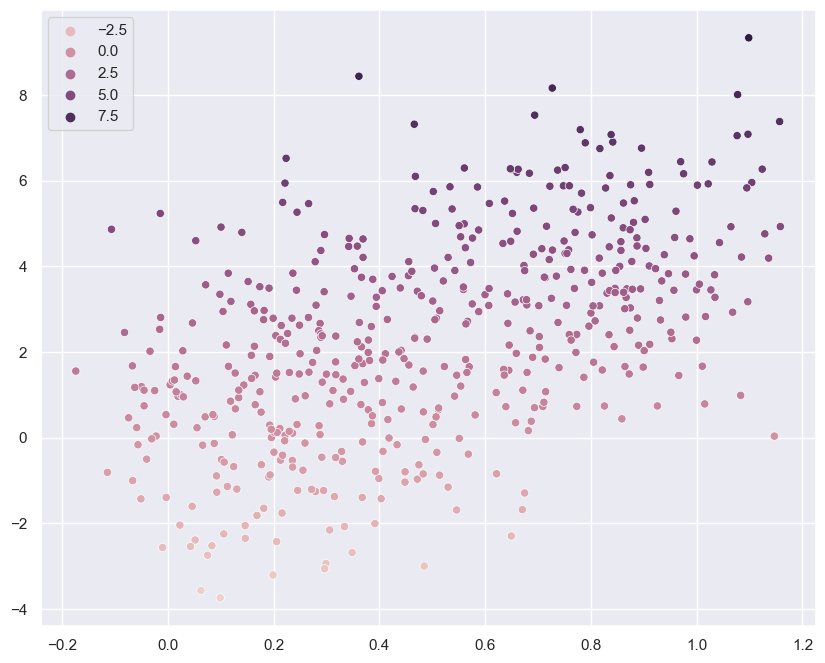

In [106]:
sns.scatterplot(x=x, y=y, hue=y);

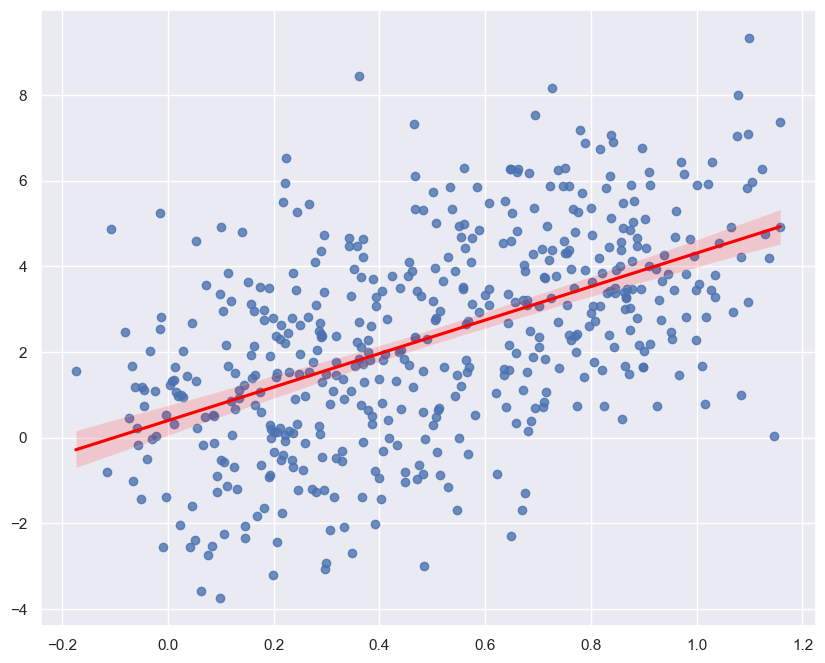

In [107]:
sns.regplot(x="x", y="y", data=df, line_kws={"color": "red"});

### Гистограмма

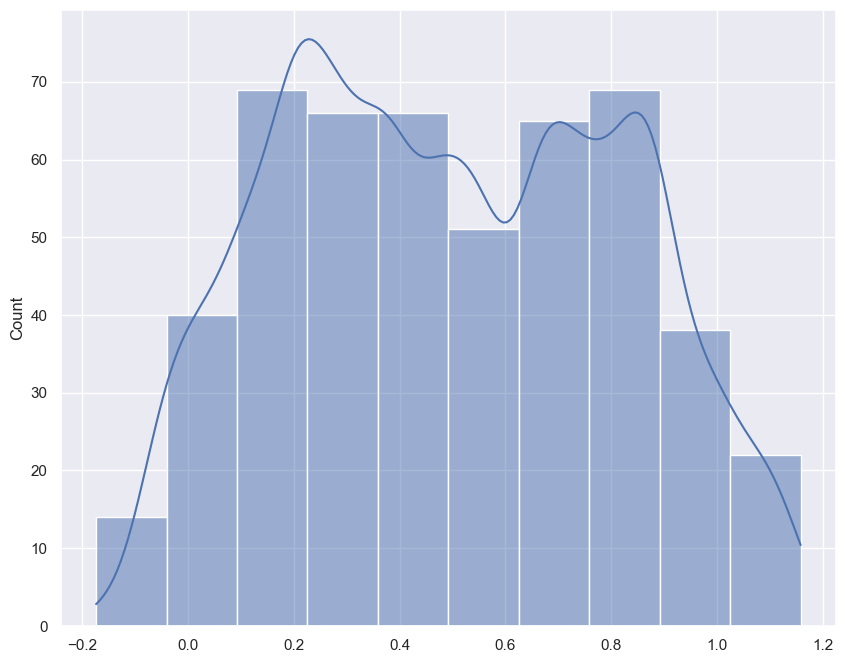

In [118]:
sns.histplot(x=x, kde=True, kde_kws={'bw_adjust': 0.5});

### Тепловая карта

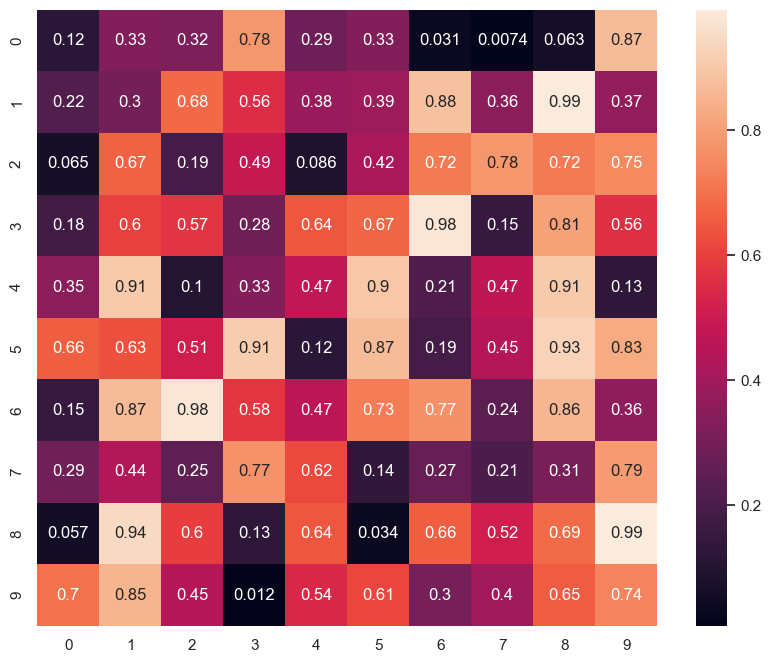

In [126]:
sns.heatmap(np.random.rand(10, 10), annot=True);
# Теплушка матрицы 10 на 10, заполненной случайными числами от 0 до 1

### Pair plot

In [119]:
df = sns.load_dataset("iris")
# знаменитый датасет с цветочками :-)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


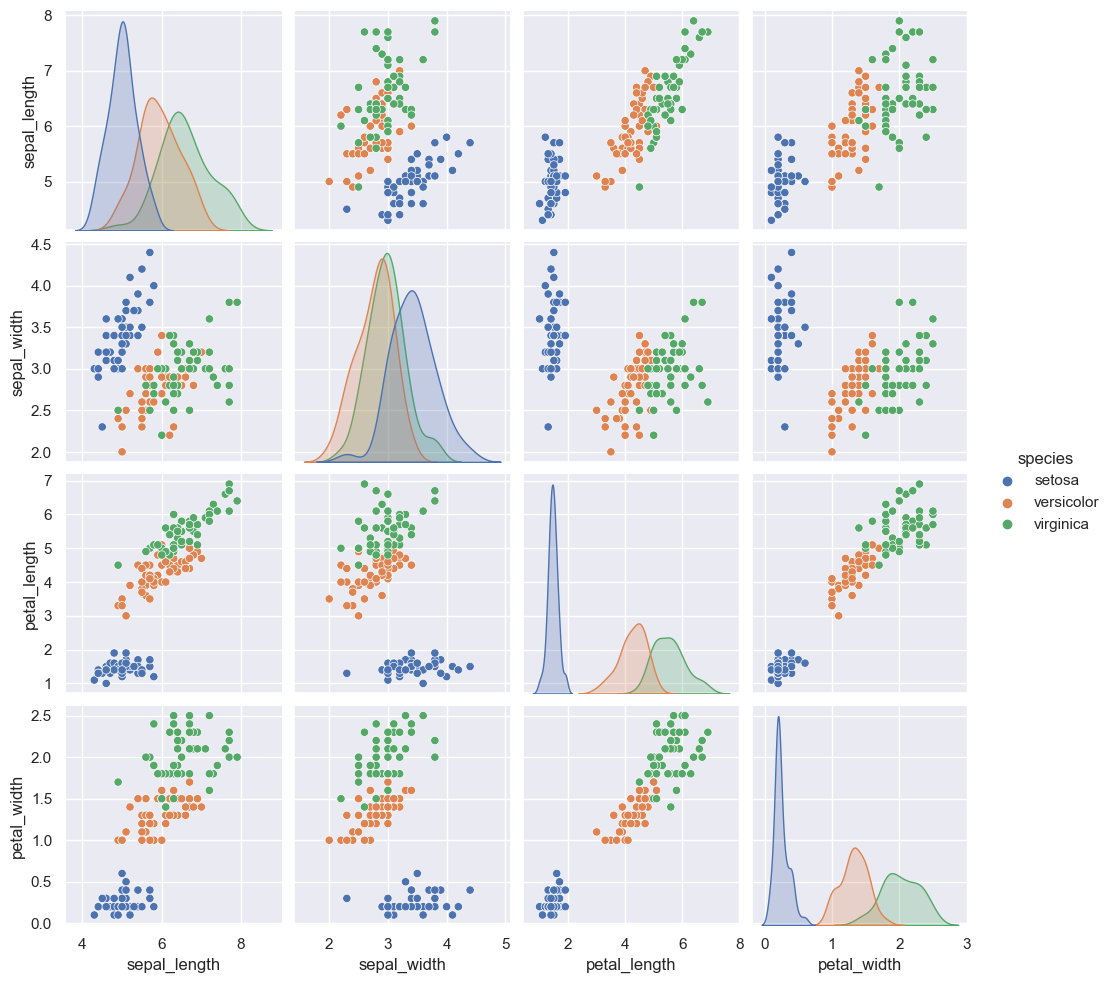

In [122]:
sns.pairplot(df, hue="species");
# рабросы строит между значениями четырех числовых колонок, группируя по цветам по колонке "species", 
# при совпадении выдает что то :-)

#### Joint distribution plot

In [124]:
df = sns.load_dataset("penguins")
# Пингвины по островкам, клювам (длина, глубина), длинам плавников, вес пингвина и пол (самка, самец)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


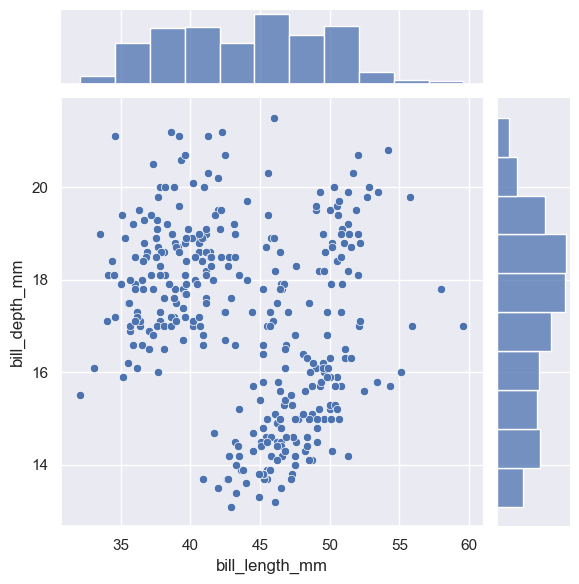

In [125]:
sns.jointplot(data=df, x="bill_length_mm", y="bill_depth_mm");
# счастливые клювики (длина и глубина)

In [128]:
df.to_csv('result.csv', index=False)

In [129]:
df = sns.load_dataset("iris")

In [130]:
df.to_csv('iris1.csv', index=False)